<a href="https://colab.research.google.com/github/Value1965/Heart/blob/main/Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [139]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [140]:
data = pd.read_csv('/content/drive/MyDrive/hacks_ai_2022/Heart/train.csv')

In [141]:
data.sample(10)

,ID,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Вы работаете?,Выход на пенсию,...,Время пробуждения,Сон после обеда,"Спорт, клубы","Религия, клубы",ID_y,Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца
635,54-002-174-01,М,в разводе,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,1,0,...,05:40:00,0,0,0,54-002-174-01,0,0,0,0,0
851,54-102-094-02,М,в браке в настоящее время,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,1,0,...,07:00:00,0,0,0,54-102-094-02,0,0,1,0,0
439,54-702-031-01,Ж,в браке в настоящее время,европейская,Русские,Христианство,2 - начальная школа,ведение домашнего хозяйства,0,1,...,08:00:00,0,0,0,54-702-031-01,1,0,1,1,0
141,54-002-166-01,Ж,гражданский брак / проживание с партнером,европейская,Русские,Христианство,4 - профессиональное училище,"работники, занятые в сфере обслуживания, торг...",1,0,...,07:00:00,0,0,0,54-002-166-01,0,0,0,0,0
784,54-102-298-01,Ж,в браке в настоящее время,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,ведение домашнего хозяйства,0,1,...,07:00:00,0,0,0,54-102-298-01,1,0,0,1,1
483,54-102-046-02,М,в браке в настоящее время,европейская,Русские,Атеист / агностик,3 - средняя школа / закон.среднее / выше среднего,низкоквалифицированные работники,1,0,...,06:00:00,0,0,0,54-102-046-02,0,0,0,0,0
427,54-002-123-01,Ж,вдовец / вдова,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,ремесленники и представители других отраслей п...,0,1,...,09:00:00,0,0,0,54-002-123-01,1,0,0,0,0
595,54-602-055-01,Ж,в браке в настоящее время,европейская,Русские,Христианство,4 - профессиональное училище,техники и младшие специалисты,0,1,...,07:00:00,0,1,0,54-602-055-01,1,0,1,0,0
136,54-103-062-01,Ж,в браке в настоящее время,европейская,Русские,Христианство,5 - ВУЗ,"представители законодат. органов власти,...",0,1,...,06:00:00,0,0,0,54-103-062-01,1,0,0,0,0
153,54-501-071-01,Ж,в браке в настоящее время,европейская,Русские,Христианство,4 - профессиональное училище,техники и младшие специалисты,0,1,...,09:00:00,0,0,0,54-501-071-01,1,0,0,0,0


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     955 non-null    object 
 1   Пол                                    954 non-null    object 
 2   Семья                                  955 non-null    object 
 3   Этнос                                  955 non-null    object 
 4   Национальность                         955 non-null    object 
 5   Религия                                955 non-null    object 
 6   Образование                            955 non-null    object 
 7   Профессия                              955 non-null    object 
 8   Вы работаете?                          955 non-null    int64  
 9   Выход на пенсию                        955 non-null    int64  
 10  Прекращение работы по болезни          955 non-null    int64  
 11  Сахарн

In [143]:
data.isna().sum()

ID                                         0
Пол                                        1
Семья                                      0
Этнос                                      0
Национальность                             0
Религия                                    0
Образование                                0
Профессия                                  0
Вы работаете?                              0
Выход на пенсию                            0
Прекращение работы по болезни              0
Сахарный диабет                            0
Гепатит                                    0
Онкология                                  0
Хроническое заболевание легких             0
Бронжиальная астма                         0
Туберкулез легких                          0
ВИЧ/СПИД                                   0
Регулярный прим лекарственных средств      0
Травмы за год                              0
Переломы                                   0
Статус Курения                             0
Возраст ку

In [144]:
# Выведем значения признаков
i=0
for col in data.keys():
    print(f"{col} DISTRIBUTION")
    print(data[col].value_counts())
    i+=1


ID DISTRIBUTION
54-102-358-02    1
54-001-096-01    1
54-102-271-01    1
54-002-021-01    1
54-103-030-01    1
                ..
54-102-162-01    1
54-103-085-02    1
54-501-045-01    1
54-102-214-02    1
54-702-016-01    1
Name: ID, Length: 955, dtype: int64
Пол DISTRIBUTION
Ж    667
М    287
Name: Пол, dtype: int64
Семья DISTRIBUTION
в браке в настоящее время                          563
вдовец / вдова                                     143
в разводе                                          125
гражданский брак / проживание с партнером           79
никогда не был(а) в браке                           43
раздельное проживание (официально не разведены)      2
Name: Семья, dtype: int64
Этнос DISTRIBUTION
европейская                                                                                                      931
другая азиатская (Корея, Малайзия, Таиланд, Вьетнам, Казахстан, Киргизия, Туркмения, Узбекистан, Таджикистан)     17
прочее (любая иная этно-расовая группа, не представл

In [145]:
#data.loc[304,'Пол']='Ж'
#data.drop(data.loc[data['Пол'].isnull()].index, inplace=True)
indecies=data.loc[(data['Алкоголь']!='никогда не употреблял')&(data['Возраст алког'].isnull())].index
#data.loc[(data['Возраст алког'].isnull())].index
data.loc[indecies]
data.loc[indecies,'Возраст алког']=0.0 #20.0

In [146]:
indecies=data.loc[(data['Статус Курения']!='Никогда не курил(а)')&(data['Возраст курения'].isnull())].index
#data.loc[(data['Возраст алког'].isnull())].index
data.loc[indecies,'Возраст курения']=0.0#'1-2 раза в неделю'
data['Возраст курения'] = data['Возраст курения'].fillna(0.0)

In [147]:
indecies=data.loc[(data['Статус Курения']!='Никогда не курил(а)')&(data['Сигарет в день'].isnull())].index
#data.loc[(data['Возраст алког'].isnull())].index
data.loc[indecies,'Сигарет в день']=0.0#'1-2 раза в неделю'
data['Сигарет в день'] = data['Сигарет в день'].fillna(0.0)

In [148]:
indecies=data.loc[(data['Пассивное курение']==1)&(data['Частота пасс кур'].isnull())].index

#data.loc[(data['Возраст алког'].isnull())].index
data.loc[indecies,'Частота пасс кур']='Нет'#'1-2 раза в неделю'
#data.drop(indecies, inplace=True)
data['Частота пасс кур'] = data['Частота пасс кур'].fillna('Нет')
#data.drop(data.loc[(data['Пассивное курение']==1)&(data['Частота пасс кур']=='Нет')&(data['Вы работаете?']==0)].index, inplace=True)
#data.loc[(data['Пассивное курение']==1)&(data['Частота пасс кур']=='Нет')&(data['Вы работаете?']==0),'Частота пасс кур']='4 и более раз в день'
#data.loc[data[target_cols]==data.loc[(data['Пассивное курение']==1)&(data['Частота пасс кур']=='Нет')&(data['Вы работаете?']==0)][target_cols]]

In [149]:
# Посмотреть соответстаия между полом и профессией
data.loc[(data['Профессия']=='работники,  занятые в сфере обслуживания, торговые работники магазинов и рынков')].groupby(['Пол','Профессия']).agg(['count'])['ID']
#data.groupby(['Пол','Профессия']).agg(['count'])

,,count
Пол,Профессия,
Ж,"работники, занятые в сфере обслуживания, торговые работники магазинов и рынков",95
М,"работники, занятые в сфере обслуживания, торговые работники магазинов и рынков",27


In [150]:

data.loc[304,'Пол']='Ж'


In [151]:
ID_cols=['ID']
cat_cols=[
 'Пол',
 'Семья',
 'Этнос',                                 
 'Национальность',                        
 'Религия',                               
 'Образование',                           
 'Профессия',                             
 'Вы работаете?',                         
 'Выход на пенсию',                       
 'Прекращение работы по болезни',         
 'Сахарный диабет',                       
 'Гепатит',                               
 'Онкология',                             
 'Хроническое заболевание легких',        
 'Бронжиальная астма',                    
 'Туберкулез легких ',                     
 'ВИЧ/СПИД',                              
 'Регулярный прим лекарственных средств', 
 'Травмы за год',
 'Переломы',     
 'Статус Курения',


'Пассивное курение',

'Алкоголь',

'Сон после обеда',
'Спорт, клубы',
'Религия, клубы',
'Частота пасс кур'  
]

ignored_cols=[
  'Туберкулез легких '#,                     
  #'ВИЧ/СПИД'                                          
]

smoking_cols = [
 'Возраст курения',
 'Сигарет в день'


]              
sleeping_cols = [
 'Время засыпания',
 'Время пробуждения'
                 
]          
passive_smoking_cols=[
 'Частота пасс кур'                      
]
alcogol_cols=['Возраст алког']
target_cols=['Артериальная гипертензия','ОНМК','Стенокардия, ИБС, инфаркт миокарда','Сердечная недостаточность','Прочие заболевания сердца']

In [152]:
data.loc[(data['Туберкулез легких ']==1)]

,ID,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Вы работаете?,Выход на пенсию,...,Время пробуждения,Сон после обеда,"Спорт, клубы","Религия, клубы",ID_y,Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца
91,54-601-001-02,М,вдовец / вдова,европейская,Русские,Христианство,4 - профессиональное училище,ремесленники и представители других отраслей п...,0,1,...,06:00:00,1,0,0,54-601-001-02,0,0,1,0,0
171,54-102-305-01,Ж,никогда не был(а) в браке,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,1,...,05:00:00,0,0,0,54-102-305-01,1,0,1,1,0
254,54-102-108-01,Ж,вдовец / вдова,европейская,Русские,Христианство,4 - профессиональное училище,"работники, занятые в сфере обслуживания, торг...",0,0,...,05:00:00,1,0,0,54-102-108-01,1,0,1,0,0
280,54-601-048-02,М,гражданский брак / проживание с партнером,европейская,Русские,Нет,2 - начальная школа,низкоквалифицированные работники,0,0,...,04:30:00,0,0,0,54-601-048-02,1,0,1,1,1
319,54-101-051-01,Ж,вдовец / вдова,европейская,Русские,Христианство,4 - профессиональное училище,низкоквалифицированные работники,1,0,...,06:00:00,1,0,0,54-101-051-01,1,0,0,0,0
351,54-001-105-03,М,в браке в настоящее время,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,ведение домашнего хозяйства,0,0,...,08:00:00,0,0,0,54-001-105-03,0,0,0,0,0
363,54-503-015-01,М,в браке в настоящее время,европейская,Русские,Христианство,4 - профессиональное училище,операторы и монтажники установок и машинного о...,0,0,...,06:00:00,0,0,0,54-503-015-01,1,0,0,0,0
442,54-102-348-01,Ж,никогда не был(а) в браке,"прочее (любая иная этно-расовая группа, не пре...",Татары,Ислам,4 - профессиональное училище,служащие,0,0,...,08:00:00,0,0,0,54-102-348-01,1,0,0,0,0
566,54-102-240-01,М,никогда не был(а) в браке,европейская,Русские,Христианство,5 - ВУЗ,"представители законодат. органов власти,...",1,0,...,10:00:00,0,0,0,54-102-240-01,0,0,0,0,0
568,54-102-277-01,Ж,в разводе,европейская,Русские,Христианство,4 - профессиональное училище,техники и младшие специалисты,1,0,...,07:00:00,1,0,0,54-102-277-01,0,0,0,0,0


In [153]:
data.loc[(data['ВИЧ/СПИД']==1)]

,ID,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Вы работаете?,Выход на пенсию,...,Время пробуждения,Сон после обеда,"Спорт, клубы","Религия, клубы",ID_y,Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца
290,54-001-034-01,Ж,вдовец / вдова,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,низкоквалифицированные работники,0,0,...,07:00:00,0,0,0,54-001-034-01,0,0,0,0,0
351,54-001-105-03,М,в браке в настоящее время,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,ведение домашнего хозяйства,0,0,...,08:00:00,0,0,0,54-001-105-03,0,0,0,0,0


In [154]:

alcogol_data=data[alcogol_cols]
alcogol_data=alcogol_data.fillna(0.0)
alcogol_data.isna().sum()

Возраст алког    0
dtype: int64

In [155]:

smoking_data=data[smoking_cols]
smoking_data=smoking_data.fillna(0.0)
smoking_data.isna().sum()

Возраст курения    0
Сигарет в день     0
dtype: int64

In [156]:
smoking_data

,Возраст курения,Сигарет в день
0,15.0,20.0
1,0.0,0.0
2,0.0,0.0
3,12.0,10.0
4,0.0,0.0
...,...,...
950,16.0,20.0
951,15.0,10.0
952,20.0,10.0
953,0.0,0.0


In [157]:
passive_smoking_data=data[passive_smoking_cols]
passive_smoking_data=passive_smoking_data.fillna('Нет')
passive_smoking_data.isna().sum()


Частота пасс кур    0
dtype: int64

In [158]:
def time_to_float(s):
  return int(s[0:2])+int(s[3:5])/60   
def time_24(s):
  if s>24:
    s=s-24  
  return s
time_to_float('07:15:00')
data[sleeping_cols[1]].apply(time_to_float)                                                       

0      6.00
1      4.00
2      7.00
3      7.00
4      6.00
       ... 
950    6.00
951    7.25
952    8.00
953    8.50
954    5.00
Name: Время пробуждения, Length: 955, dtype: float64

In [159]:
def new_col():
  pass
#X['Время сна']=X['Время пробуждения']-X['Время засыпания'] if X['Время пробуждения']> X['Время засыпания'] else X['Время пробуждения']-X['Время засыпания']+24
#data['Время сна']=data['Время пробуждения']-data['Время засыпания']+24

In [160]:
X=data[cat_cols]
#X=X.add(data[sleeping_cols[0]].apply(time_to_float).transpose())
#X=X.add(data[sleeping_cols[1]].apply(time_to_float).transpose())
#X=X.add(smoking_data.transpose())
#X.head()
X = pd.concat([X, data[sleeping_cols[0]].apply(time_to_float),data[sleeping_cols[1]].apply(time_to_float),smoking_data,alcogol_data], axis=1) #,passive_smoking_data 
#cat_cols = cat_cols + passive_smoking_cols

# Время сна
#X['Время сна']=X['Время пробуждения']-X['Время засыпания']+24
#X['Время сна']=X['Время сна'].apply(time_24)
#X.drop(columns = ['Время пробуждения'],axis = 1,inplace=True)

X.head(955) #114)

,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Вы работаете?,Выход на пенсию,Прекращение работы по болезни,...,Алкоголь,Сон после обеда,"Спорт, клубы","Религия, клубы",Частота пасс кур,Время засыпания,Время пробуждения,Возраст курения,Сигарет в день,Возраст алког
0,М,в браке в настоящее время,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,низкоквалифицированные работники,1,0,0,...,употребляю в настоящее время,0,0,0,Нет,22.0,6.00,15.0,20.0,18.0
1,Ж,в разводе,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,0,0,...,никогда не употреблял,1,0,0,Нет,0.0,4.00,0.0,0.0,0.0
2,Ж,в браке в настоящее время,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,0,0,...,употребляю в настоящее время,0,0,0,1-2 раза в неделю,23.0,7.00,0.0,0.0,17.0
3,М,в браке в настоящее время,европейская,Русские,Атеист / агностик,3 - средняя школа / закон.среднее / выше среднего,низкоквалифицированные работники,1,0,0,...,употребляю в настоящее время,0,0,0,3-6 раз в неделю,23.0,7.00,12.0,10.0,13.0
4,Ж,в браке в настоящее время,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,операторы и монтажники установок и машинного о...,0,0,1,...,употребляю в настоящее время,0,0,0,не менее 1 раза в день,23.0,6.00,0.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,М,в браке в настоящее время,европейская,Русские,Христианство,4 - профессиональное училище,операторы и монтажники установок и машинного о...,1,0,0,...,употребляю в настоящее время,0,0,0,Нет,22.0,6.00,16.0,20.0,18.0
951,Ж,вдовец / вдова,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,низкоквалифицированные работники,1,0,0,...,ранее употреблял,0,0,0,Нет,21.5,7.25,15.0,10.0,26.0
952,Ж,в браке в настоящее время,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,служащие,0,1,0,...,употребляю в настоящее время,1,0,0,Нет,22.5,8.00,20.0,10.0,20.0
953,Ж,в браке в настоящее время,европейская,Русские,Атеист / агностик,5 - ВУЗ,"представители законодат. органов власти,...",1,0,0,...,употребляю в настоящее время,0,1,0,Нет,23.0,8.50,0.0,0.0,21.0


In [161]:
Y1=data['Артериальная гипертензия'].values
Y2=data['ОНМК'].values
Y3=data['Стенокардия, ИБС, инфаркт миокарда'].values
Y4=data['Сердечная недостаточность'].values                  
Y5=data['Прочие заболевания сердца'].values 



In [162]:
# Проверяем остались ли нулевые значения.
X.isna().sum()

Пол                                      0
Семья                                    0
Этнос                                    0
Национальность                           0
Религия                                  0
Образование                              0
Профессия                                0
Вы работаете?                            0
Выход на пенсию                          0
Прекращение работы по болезни            0
Сахарный диабет                          0
Гепатит                                  0
Онкология                                0
Хроническое заболевание легких           0
Бронжиальная астма                       0
Туберкулез легких                        0
ВИЧ/СПИД                                 0
Регулярный прим лекарственных средств    0
Травмы за год                            0
Переломы                                 0
Статус Курения                           0
Пассивное курение                        0
Алкоголь                                 0
Сон после о

In [163]:
def model_fit(model,X,Y):

  cv = GridSearchCV(model, param_grid=parameters, n_jobs=-1, scoring='recall', return_train_score=True)
  cv.fit(X, Y, cat_features=cat_cols)

  best_model = cv.best_estimator_
  print(cv.best_params_)

  print(cv.best_score_)

  for key in cv.cv_results_.keys():
    print(key,cv.cv_results_[key][cv.best_index_])

  cv_imp = pd.Series(best_model.get_feature_importance(),X.columns)
  fig, ax = plt.subplots(figsize=(16,14))
  cv_imp.plot.bar(ax=ax)
  ax.set_title("Важность признаков")
  ax.set_ylabel('Важность, %')
  fig.tight_layout()

  return cv

In [164]:
# YOUR CODE
!pip install catboost
import catboost

from sklearn.model_selection import train_test_split, GridSearchCV

#X_origin = data[feature_cols]
#y = data[target_col]

#X_train, X_test, y_train, y_test = train_test_split(X_origin, y, 
                                                    #train_size=0.8,
                                                    #random_state=42)
X.to_csv('/content/drive/MyDrive/hacks_ai_2022/Heart/X.csv', index=None)    
X1 = X.copy(deep=True)
X2 = X.copy(deep=True)
X3 = X.copy(deep=True)
X4 = X.copy(deep=True)
X5 = X.copy(deep=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [165]:



parameters = {
    
    'learning_rate' :  [0.0001,0.0002,0.0003],#,0.0004,0.0005],
    'depth' :[4,5,6],
    'n_estimators'  : [50,100],
    'l2_leaf_reg':[2,2.5,3,3.5,4]
    
 #   'grow_policy'   : ['Depthwise','Lossguide','SymmetricTree'],
 #   'leaf_estimation_method' : ['Newton','Gradient','Exact']
}


{'depth': 4, 'l2_leaf_reg': 2, 'learning_rate': 0.0001, 'n_estimators': 50}
0.874307116104869
mean_fit_time 0.683759069442749
std_fit_time 0.2522717621046298
mean_score_time 0.02816042900085449
std_score_time 0.012124898646714889
param_depth 4
param_l2_leaf_reg 2
param_learning_rate 0.0001
param_n_estimators 50
params {'depth': 4, 'l2_leaf_reg': 2, 'learning_rate': 0.0001, 'n_estimators': 50}
split0_test_score 0.8651685393258427
split1_test_score 0.8089887640449438
split2_test_score 0.898876404494382
split3_test_score 0.8651685393258427
split4_test_score 0.9333333333333333
mean_test_score 0.874307116104869
std_test_score 0.041282583589658174
rank_test_score 1
split0_train_score 0.876750700280112
split1_train_score 0.8907563025210085
split2_train_score 0.8683473389355743
split3_train_score 0.876750700280112
split4_train_score 0.8595505617977528
mean_train_score 0.8744311207629119
std_train_score 0.010350998929053544


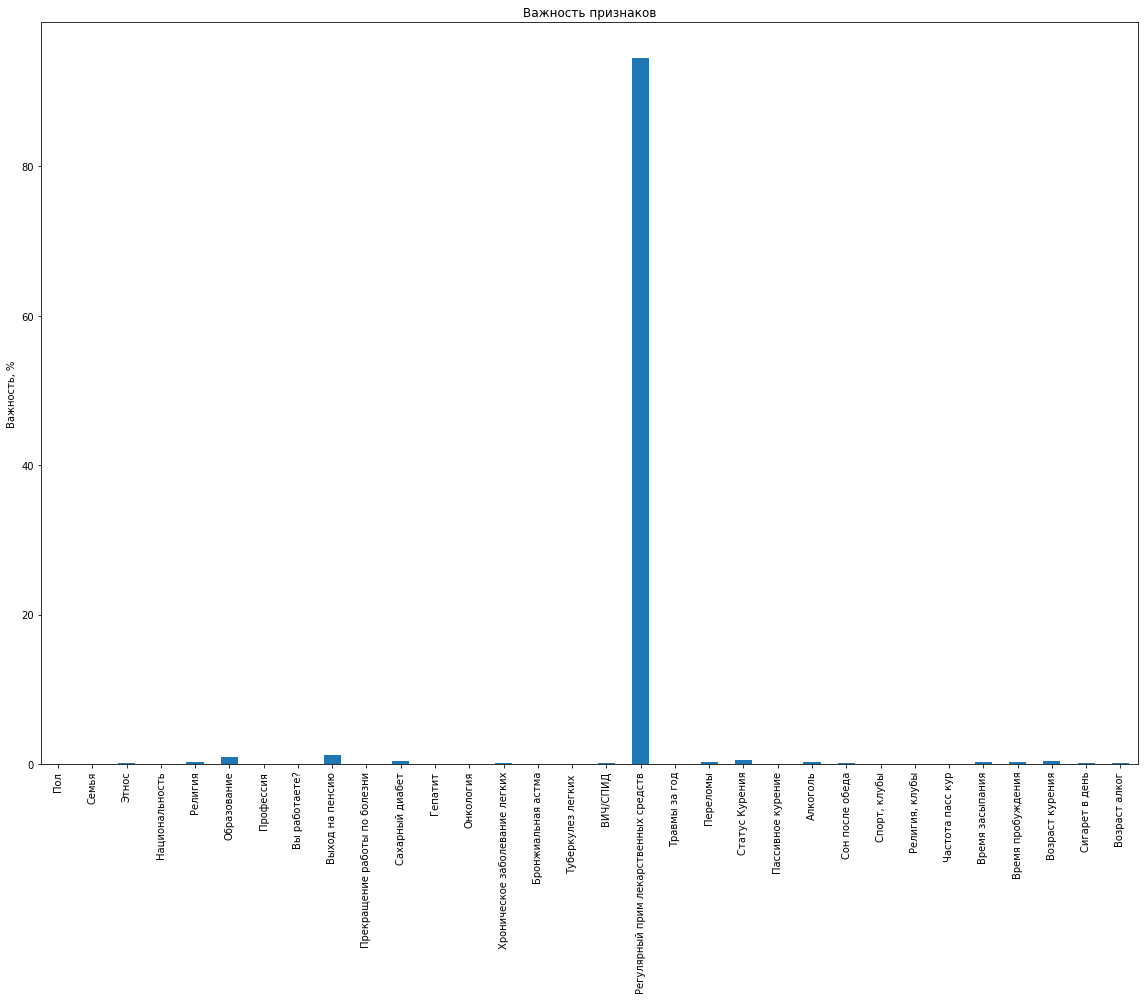

In [166]:
class_weights = dict({0:1, 1:1})
boosting_model_1 = catboost.CatBoostClassifier(logging_level='Silent', class_weights=class_weights,  od_type = "Iter",od_wait = 20,boosting_type='Ordered',ignored_features=ignored_cols) #,custom_loss=['Accutacy'])
cv1=model_fit(boosting_model_1,X1,Y1)


{'depth': 4, 'l2_leaf_reg': 2, 'learning_rate': 0.0003, 'n_estimators': 50}
0.8527777777777779
mean_fit_time 0.7142579555511475
std_fit_time 0.09465614216995856
mean_score_time 0.02986307144165039
std_score_time 0.007942525805879477
param_depth 4
param_l2_leaf_reg 2
param_learning_rate 0.0003
param_n_estimators 50
params {'depth': 4, 'l2_leaf_reg': 2, 'learning_rate': 0.0003, 'n_estimators': 50}
split0_test_score 0.875
split1_test_score 0.75
split2_test_score 0.75
split3_test_score 1.0
split4_test_score 0.8888888888888888
mean_test_score 0.8527777777777779
std_test_score 0.09444444444444446
rank_test_score 1
split0_train_score 0.9090909090909091
split1_train_score 1.0
split2_train_score 0.9393939393939394
split3_train_score 0.8787878787878788
split4_train_score 0.90625
mean_train_score 0.9267045454545455
std_train_score 0.04137119755511278


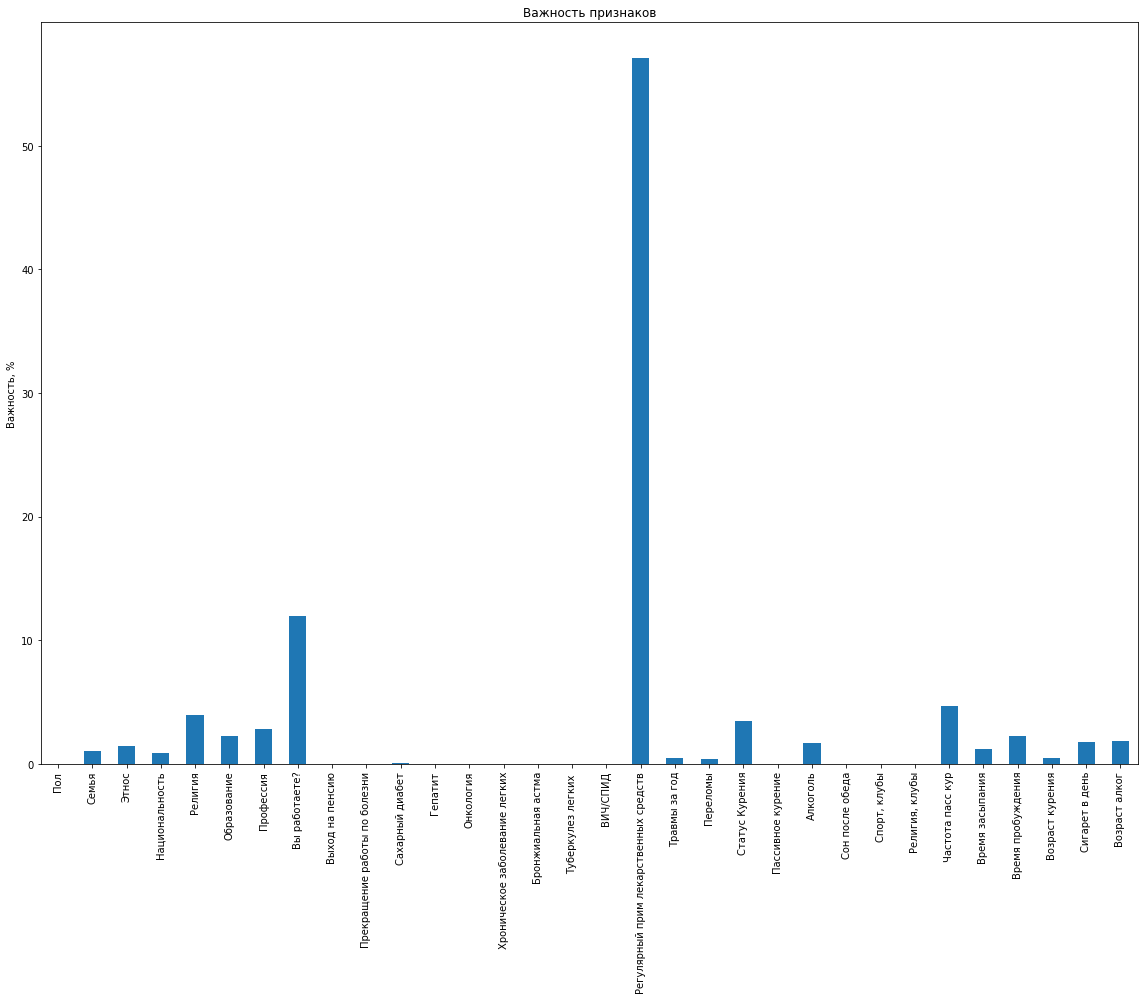

In [167]:
class_weights = dict({0:1, 1:26})
boosting_model_2 = catboost.CatBoostClassifier(logging_level='Silent', class_weights=class_weights,  od_type = "Iter",od_wait = 20,boosting_type='Ordered',ignored_features=ignored_cols)
cv2=model_fit(boosting_model_2,X2,Y2)


{'depth': 6, 'l2_leaf_reg': 2.5, 'learning_rate': 0.0003, 'n_estimators': 50}
0.9231884057971014
mean_fit_time 0.6771553516387939
std_fit_time 0.021409499265078923
mean_score_time 0.013397979736328124
std_score_time 0.005024960370208343
param_depth 6
param_l2_leaf_reg 2.5
param_learning_rate 0.0003
param_n_estimators 50
params {'depth': 6, 'l2_leaf_reg': 2.5, 'learning_rate': 0.0003, 'n_estimators': 50}
split0_test_score 1.0
split1_test_score 0.9130434782608695
split2_test_score 0.8695652173913043
split3_test_score 0.875
split4_test_score 0.9583333333333334
mean_test_score 0.9231884057971014
std_test_score 0.04987118462259119
rank_test_score 1
split0_train_score 0.9042553191489362
split1_train_score 0.925531914893617
split2_train_score 0.9361702127659575
split3_train_score 0.9354838709677419
split4_train_score 0.9247311827956989
mean_train_score 0.9252345001143902
std_train_score 0.011533492376055467


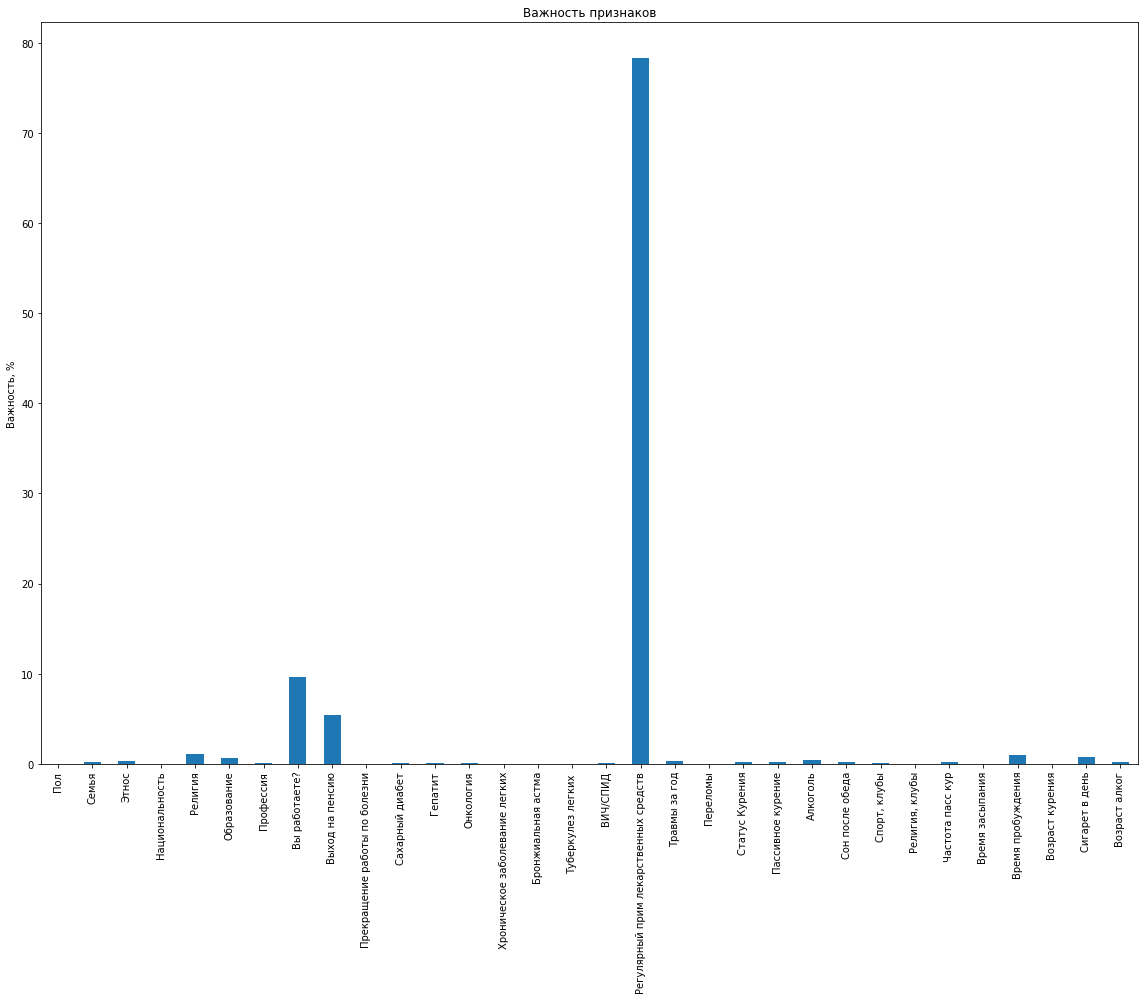

In [168]:
class_weights = dict({0:1, 1:8})
boosting_model_3 = catboost.CatBoostClassifier(logging_level='Silent', class_weights=class_weights,  od_type = "Iter",od_wait = 20,boosting_type='Ordered',ignored_features=ignored_cols)
cv3=model_fit(boosting_model_3,X3,Y3)

{'depth': 4, 'l2_leaf_reg': 3.5, 'learning_rate': 0.0001, 'n_estimators': 50}
0.8336842105263157
mean_fit_time 0.4938175201416016
std_fit_time 0.029103425063590323
mean_score_time 0.011965799331665038
std_score_time 0.0018847393360896412
param_depth 4
param_l2_leaf_reg 3.5
param_learning_rate 0.0001
param_n_estimators 50
params {'depth': 4, 'l2_leaf_reg': 3.5, 'learning_rate': 0.0001, 'n_estimators': 50}
split0_test_score 0.9473684210526315
split1_test_score 0.9473684210526315
split2_test_score 0.8421052631578947
split3_test_score 0.631578947368421
split4_test_score 0.8
mean_test_score 0.8336842105263157
std_test_score 0.11653349476293091
rank_test_score 1
split0_train_score 0.8701298701298701
split1_train_score 0.8831168831168831
split2_train_score 0.9090909090909091
split3_train_score 0.8051948051948052
split4_train_score 0.9210526315789473
mean_train_score 0.877717019822283
std_train_score 0.04051787544453375


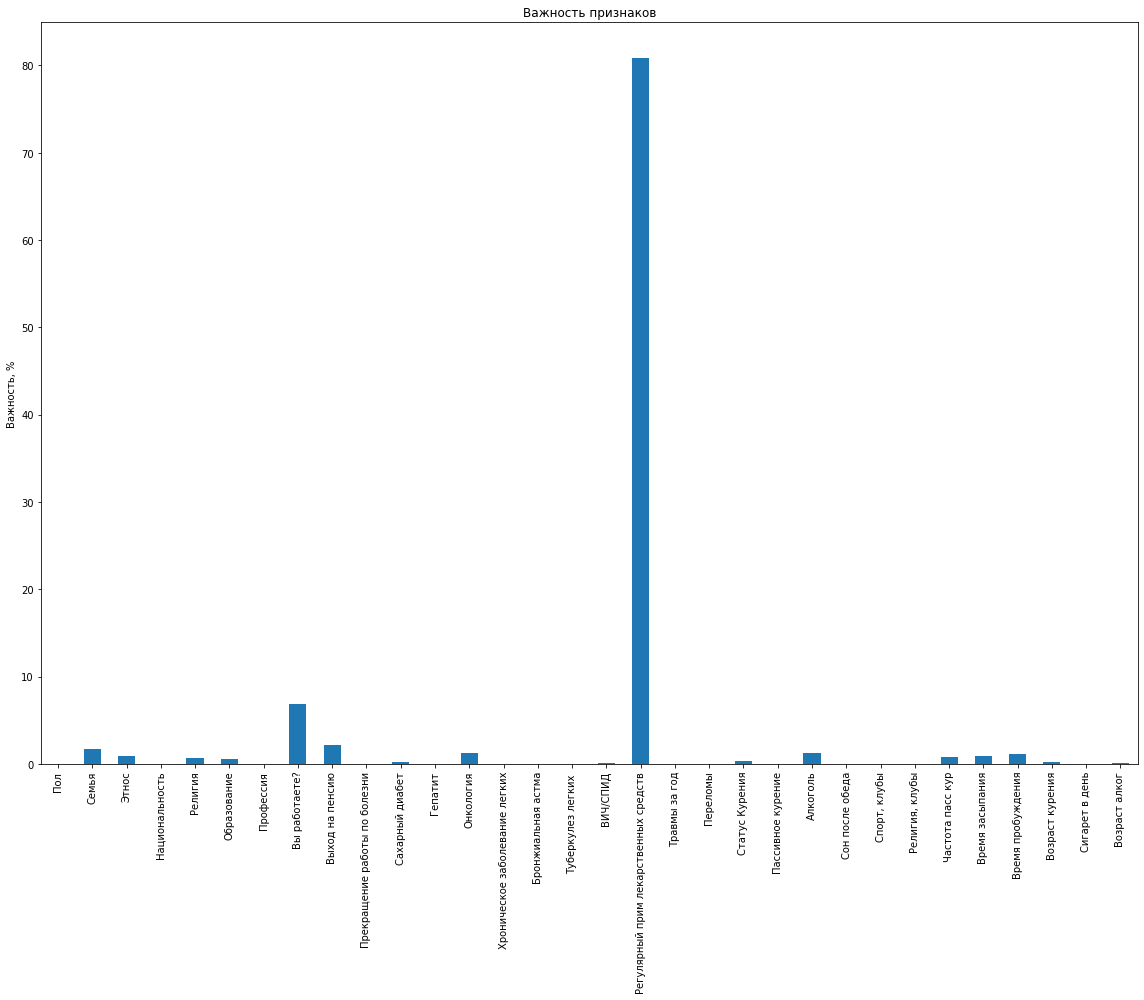

In [169]:
class_weights = dict({0:1, 1:10}) #9

boosting_model_4 = catboost.CatBoostClassifier(logging_level='Silent', class_weights=class_weights,  od_type = "Iter",od_wait = 20,boosting_type='Ordered',ignored_features=ignored_cols)
cv4=model_fit(boosting_model_4,X4,Y4)

{'depth': 4, 'l2_leaf_reg': 3.5, 'learning_rate': 0.0003, 'n_estimators': 50}
0.9300653594771242
mean_fit_time 0.41524548530578614
std_fit_time 0.037378357350995414
mean_score_time 0.012506580352783203
std_score_time 0.0026065793442841363
param_depth 4
param_l2_leaf_reg 3.5
param_learning_rate 0.0003
param_n_estimators 50
params {'depth': 4, 'l2_leaf_reg': 3.5, 'learning_rate': 0.0003, 'n_estimators': 50}
split0_test_score 1.0
split1_test_score 0.7058823529411765
split2_test_score 1.0
split3_test_score 1.0
split4_test_score 0.9444444444444444
mean_test_score 0.9300653594771242
std_test_score 0.11413793439447356
rank_test_score 1
split0_train_score 1.0
split1_train_score 0.8840579710144928
split2_train_score 1.0
split3_train_score 1.0
split4_train_score 0.9852941176470589
mean_train_score 0.9738704177323104
std_train_score 0.04526597334341752


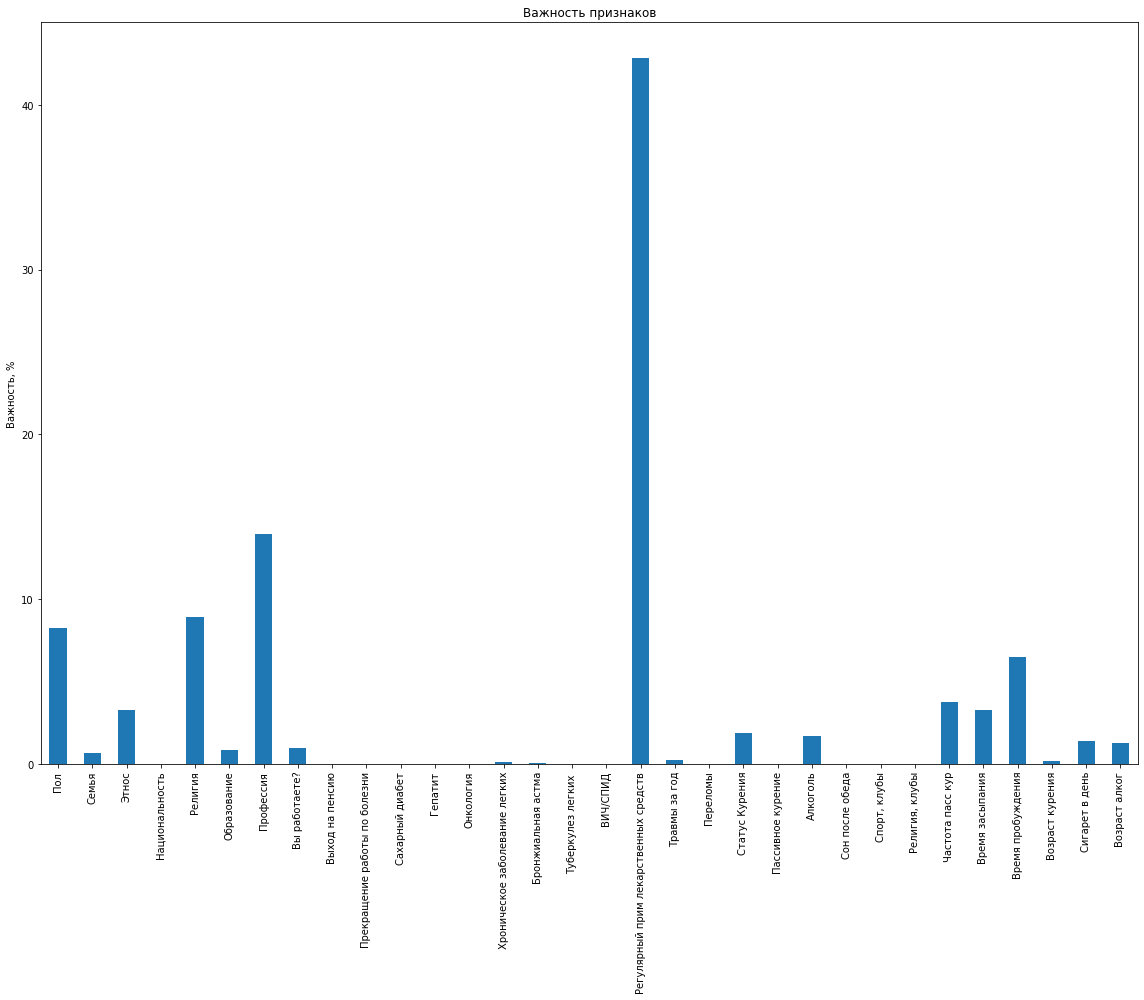

In [170]:
class_weights = dict({0:1, 1:12}) #11

boosting_model_5 = catboost.CatBoostClassifier(logging_level='Silent', class_weights=class_weights,  boosting_type='Ordered',od_type = "Iter",od_wait = 20,ignored_features=ignored_cols)
cv5=model_fit(boosting_model_5,X5,Y5)


In [171]:
print(cv1.best_params_)
print(cv1.best_score_)
print(cv2.best_params_)
print(cv2.best_score_)
print(cv3.best_params_)
print(cv3.best_score_)
print(cv4.best_params_)
print(cv4.best_score_)
print(cv5.best_params_)
print(cv5.best_score_)

{'depth': 4, 'l2_leaf_reg': 2, 'learning_rate': 0.0001, 'n_estimators': 50}
0.874307116104869
{'depth': 4, 'l2_leaf_reg': 2, 'learning_rate': 0.0003, 'n_estimators': 50}
0.8527777777777779
{'depth': 6, 'l2_leaf_reg': 2.5, 'learning_rate': 0.0003, 'n_estimators': 50}
0.9231884057971014
{'depth': 4, 'l2_leaf_reg': 3.5, 'learning_rate': 0.0001, 'n_estimators': 50}
0.8336842105263157
{'depth': 4, 'l2_leaf_reg': 3.5, 'learning_rate': 0.0003, 'n_estimators': 50}
0.9300653594771242


In [172]:
test=pd.read_csv('/content/drive/MyDrive/hacks_ai_2022/Heart/test_dataset_test.csv')
test[passive_smoking_cols]=test[passive_smoking_cols].fillna('нет')
ID = test['ID']
X_test = test[cat_cols]
#X_test.add(test[sleeping_cols[0]].apply(time_to_float))
#X_test.add(test[sleeping_cols[1]].apply(time_to_float))
smoking_test=test[smoking_cols]
smoking_test=smoking_test.fillna(0.0)

alcogol_test=test[alcogol_cols]
alcogol_test=alcogol_test.fillna(0.0)


#X_test.add(smoking_test)
X_test = pd.concat([X_test, test[sleeping_cols[0]].apply(time_to_float),test[sleeping_cols[1]].apply(time_to_float),smoking_test,alcogol_test], axis=1) # 

# Время сна
#X_test['Время сна']=X_test['Время пробуждения']-X_test['Время засыпания']+24
#X_test['Время сна']=X_test['Время сна'].apply(time_24)
#X_test.drop(columns = ['Время пробуждения'],axis = 1, inplace = True)

#cv1.
#best_model_1 = boosting_model_1
best_model_1 = cv1.best_estimator_
best_model_2 = cv2.best_estimator_
best_model_3 = cv3.best_estimator_
best_model_4 = cv4.best_estimator_
best_model_5 = cv5.best_estimator_

Y1_pred = np.around(best_model_1.predict_proba(X_test)[:,1]).astype(int)
Y2_pred = np.around(best_model_2.predict_proba(X_test)[:,1]).astype(int)
Y3_pred = np.around(best_model_3.predict_proba(X_test)[:,1]).astype(int)
Y4_pred = np.around(best_model_4.predict_proba(X_test)[:,1]).astype(int)
Y5_pred = np.around(best_model_5.predict_proba(X_test)[:,1]).astype(int)



targets=np.array([Y1_pred,Y2_pred,Y3_pred,Y4_pred,Y5_pred]).transpose()

columns = ['Артериальная гипертензия', 'ОНМК', 'Стенокардия, ИБС, инфаркт миокарда', 'Сердечная недостаточность' ,'Прочие заболевания сердца'] 



index = None 
df = pd.DataFrame(targets, index, columns)
df
df_result = pd.concat([ID,df],axis=1)

df_result.to_csv('./my_submission.csv', index=None)